# Exercise 04

**Kernel Methods in Machine Learning (CS-E4830)**

**Release date**: 22th of March, 2019

**Submission date**: 4th of April, 2019 @4PM (no late submission allowed)


### Canonical Correlation Analysis and Kernel Canonical Correlation Analysis

In this exercise, we will implement the standard eigenvalue problem for CCA and the generalised eigenvalue problem for KCCA. The aim is to understand how CCA and KCCA are applied on two-view datasets and how the result is interpreted. All theory needed to complete these exercises can be found in the lecture material.

In contrast to the previous Jupyter exercises, these tasks will be graded manually and there are no hidden tests. To see whether the codes are correct, you can compare the result with the examples given on slides 12-13 (CCA example) and 18-19 (KCCA example). The idea is to re-produce the results of those examples.

<div class="alert alert-danger">
    Please add you student number and email address to the notebook into the corresponding cell.
</div> 

EMAIL: luis.amezcua@aalto.fi

STUDENT_NUMBER: 723565

**Import required python packages**

All tasks in this exercise can be solved by using only function and packages imported below. Please **do not** use any other imports. 

In [1]:
import numpy as np 
from numpy.linalg import inv
from numpy import linalg as LA
import pylab as pl
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
sns.set(style="white")

**CCA (2 points)**

In this section, the task is to 
- complete the ***standardize_data*** function
- complete the ***cca*** function.

The functions to generate and partition the data into training and test sets will be given.

In [2]:
def generate_data(n,p,q):
    """
    Generate a simulated two-view dataset from a random uniform distribution. We focus on two-to-two relations.
    
    Input:  n - sample size
            p - number of variables in the view X
            q - number of variables in the view Y
            
    Output: The data matrices X and Y
    """
    
    # generate data from random uniform distribution
    X = np.random.uniform(-2,2,[n,p])
    Y = np.random.uniform(-2,2,[n,q])
   
    # simulated relations
    Y[:,0] = X[:,0] + X[:,1] - Y[:,1] + np.random.normal(0,0.1,n)
    Y[:,2] = np.power(X[:,2] + X[:,3],3) - 5*Y[:,3] + np.random.normal(0,0.1,n)
    Y[:,4] = np.sin(X[:,4] + X[:,5]) - Y[:,5] + np.random.normal(0,0.1,n)
    
    return X, Y

Write a function that standardizes the variables to have a zero mean and unit variance.

In [3]:
def standardize_data(X,Y):
    """
    Standardize the dataset so that all variables have a zero mean and a unit variance.
    
    Input:  X - the first view X
            Y - the second view Y
            
    Output: The standardized data matrices Xn and Yn
    """
    # YOUR CODE HERE
    Xn = X - np.mean(X,axis=0)
    Yn = Y - np.mean(Y,axis=0)
    Xn = Xn / np.std(X,axis=0)
    Yn = Yn / np.std(Y,axis=0)
    
    #raise NotImplementedError()
    
    return Xn, Yn

The following function partitions the data into training (2/3) and test (1/3) sets.

In [4]:
def partition_data(X,Y):
    """
    Partition the observations of the sample into (2/3) training and (1/3) test sets.
    
    Input:  X - the first view X
            Y - the second view Y
            
    Output: Xtrain, Xtest, Ytrain, Ytest - The training and test matrices for the views X and Y respectively.
    """
    
    train = int(round(2 * X.shape[0] / 3)) 
    indices = np.random.permutation(X.shape[0])
    training_idx, test_idx = indices[:train], indices[train:]
    Xtrain, Xtest, Ytrain, Ytest = X[training_idx,:], X[test_idx,:], Y[training_idx,:], Y[test_idx,:]  
    
    return Xtrain, Xtest, Ytrain, Ytest


Complete the following cca function that takes as input two matrices where the rows correspond to observations and columns correspond to variables. The variable components corresponds to the number of canonical components to be extracted. The task is to 
- Fill in the blocks $\mathbf{C}_{aa}$, $\mathbf{C}_{ab}$, $\mathbf{C}_{ba}$, and $\mathbf{C}_{bb}$ of the joint covariance matrix.
- Write the expression of the canonical correlation matrix M for which the eigenvalues are computed
- Write the expression to compute $\mathbf{w}_a$. You can compute the inverse using inv().


In [5]:
def cca(X,Y,components):
    """
    This function performs CCA on the data matrices X and Y of sizes (n x p) and (n x q) respectively.
    
    Input:  X - the first view X
            Y - the second view Y
            components - scalar, the number of components to extract
            
    Output: cc - the canonical correlation
            wa - the canonical coefficient vector of size (p x components) for view X
            wb - the canonical coefficient vector of size (q x components) for view Y
    """
        
    # write the expressions of blocks of the joint covariance matrix
    # YOUR CODE HERE
    Caa = (1/(X.shape[0]-1))*X.T@X
    Cab = (1/(X.shape[0]-1))*X.T@Y
    Cba = (1/(X.shape[0]-1))*Y.T@X
    Cbb = (1/(X.shape[0]-1))*Y.T@Y
    
    
    #raise NotImplementedError()
    
    # compute the canonical correlation matrix (name it M)
    # YOUR CODE HERE
    M = inv(Cbb)@Cba@inv(Caa)@Cab
    
    
    #raise NotImplementedError()
    
    # compute the eigenvalues and eigenvectors of M
    eigvalues, eigvectors = LA.eig(M)

    # canonical correlations
    cc = np.sqrt(-np.sort(-eigvalues))
    inds = np.argsort(-eigvalues)
    eigv = eigvectors[:,inds]
       
    # wb
    wb = eigv[:,:components];
    
    # wa
    wa = np.zeros((X.shape[1],components))
    for ii in range(0,components):
        # write the expression for wa
        # YOUR CODE HERE
        wa[:,ii] = (inv(Caa)@Cab@wb[:,ii])/cc[ii]
        
        
        #raise NotImplementedError()
        
    return cc, wa, wb

The following function computes correlation between two vectors.

In [6]:
def compute_correlation(x,y):
    """
    This function computes the correlation between two vectors x and y.
    
    Input:  x - a vector
            y - a vector of same size as x
            
    Output: rho - the correlation coefficient
    """
    rho = np.inner(x, y) / (np.linalg.norm(x) * np.linalg.norm(y))     
    return rho

Now we can run CCA on a simulated dataset. We generate a simulated dataset that contains linear, cubic, and sinusoidal two-to-two relations. We set the sample size to 500 and 10 variables in both views. We standardize the variables to have a zero mean and a unit variance. The dataset is partitioned into training and test sets. We learn the canonical coefficient vectors $\mathbf{w}_a$ and $\mathbf{w}_b$ from the training data and use these on test data to evaluate whether the learnt relations are predictive for the particular dataset.

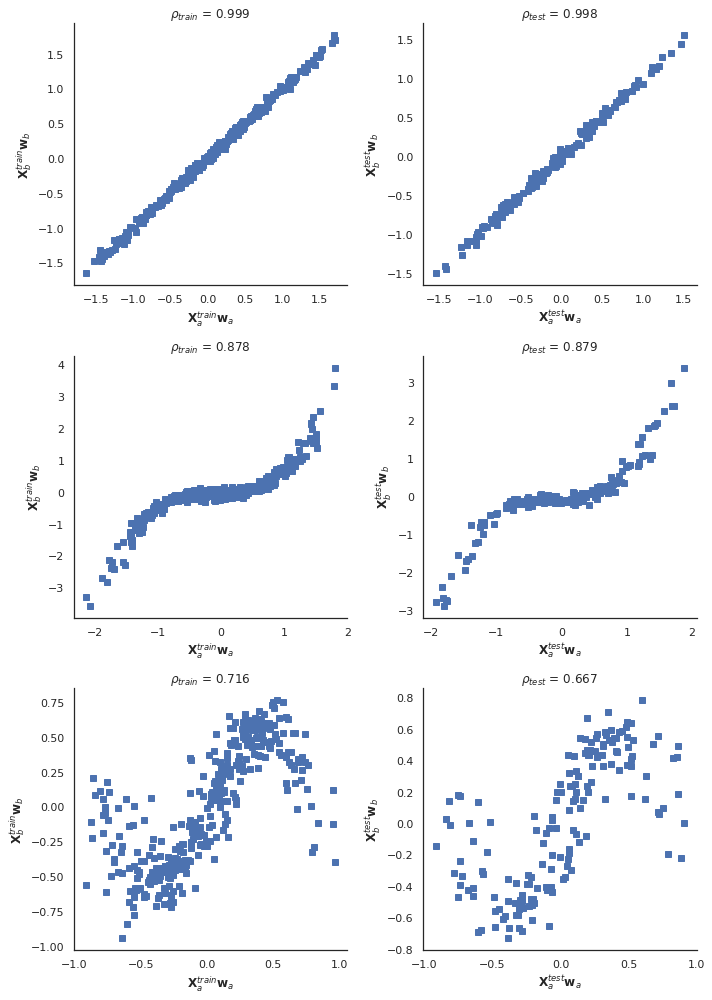

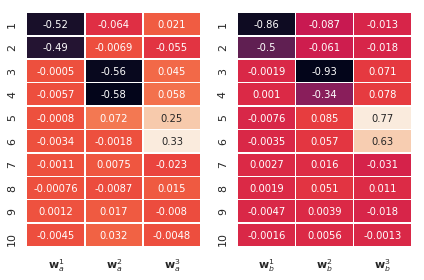

In [7]:
X, Y = generate_data(500,10,10)   
Xn, Yn = standardize_data(X,Y)
Xtrain, Xtest, Ytrain, Ytest = partition_data(Xn,Yn)   
cc, wa, wb = cca(Xtrain,Ytrain,3)
rho_test = np.zeros(wa.shape[1])
for ii in range(0,wa.shape[1]):
    rho_test[ii] = compute_correlation(Xtest @ wa[:,ii], Ytest @ wb[:,ii])  
    
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(10, 14))
ax0, ax1, ax2, ax3, ax4, ax5 = axes.flatten()
    
ax0.plot(Xtrain @ wa[:,0],Ytrain @ wb[:,0], 'bs')
ax0.set_ylabel('$\mathbf{X}_b^{train} \mathbf{w}_b$')
ax0.set_xlabel('$\mathbf{X}_a^{train} \mathbf{w}_a$')
ax0.set_title(r'$\rho_{train}$ = %1.3f' % cc[0])

ax1.plot(Xtest @ wa[:,0], Ytest @ wb[:,0], 'bs')
ax1.set_ylabel('$\mathbf{X}_b^{test} \mathbf{w}_b$')
ax1.set_xlabel('$\mathbf{X}_a^{test} \mathbf{w}_a$')
ax1.set_title(r'$\rho_{test}$ = %1.3f' % rho_test[0])

ax2.plot(Xtrain @ wa[:,1],Ytrain @ wb[:,1], 'bs')
ax2.set_ylabel('$\mathbf{X}_b^{train} \mathbf{w}_b$')
ax2.set_xlabel('$\mathbf{X}_a^{train} \mathbf{w}_a$')
ax2.set_title(r'$\rho_{train}$ = %1.3f' % cc[1])

ax3.plot(Xtest @ wa[:,1], Ytest @ wb[:,1], 'bs')
ax3.set_ylabel('$\mathbf{X}_b^{test} \mathbf{w}_b$')
ax3.set_xlabel('$\mathbf{X}_a^{test} \mathbf{w}_a$')
ax3.set_title(r'$\rho_{test}$ = %1.3f' % rho_test[1])

ax4.plot(Xtrain @ wa[:,2],Ytrain @ wb[:,2], 'bs')
ax4.set_ylabel('$\mathbf{X}_b^{train} \mathbf{w}_b$')
ax4.set_xlabel('$\mathbf{X}_a^{train} \mathbf{w}_a$')
ax4.set_title(r'$\rho_{train}$ = %1.3f' % cc[2])

ax5.plot(Xtest @ wa[:,2], Ytest @ wb[:,2], 'bs')
ax5.set_ylabel('$\mathbf{X}_b^{test} \mathbf{w}_b$')
ax5.set_xlabel('$\mathbf{X}_a^{test} \mathbf{w}_a$')
ax5.set_title(r'$\rho_{test}$ = %1.3f' % rho_test[2])

plt.tight_layout()
sns.despine()
plt.show()

fig, (ax1, ax2) = plt.subplots(1,2)   
sns.heatmap(wa, ax = ax1, annot = True, linewidths=.5, cbar = False, xticklabels = ['$\mathbf{w}_a^1$', '$\mathbf{w}_a^2$', '$\mathbf{w}_a^3$'], yticklabels = [i for i in range(1,11)]) 
sns.heatmap(wb, ax = ax2, annot = True, linewidths=.5, cbar = False, xticklabels = ['$\mathbf{w}_b^1$', '$\mathbf{w}_b^2$', '$\mathbf{w}_b^3$'], yticklabels = [i for i in range(1,11)])
plt.tight_layout()
plt.show()
    

Please answer here to the following questions:
1. What does the value of the training correlation indicate?

    It indicates the strength of the linear relation between the training sets (Xtrain and Ytrain). Training correlation shows whether learning occurs. The higher this value is, the better the learning is occuring.


2. What does the value of the test correlation indicate?

    It indicates the actual correlation of the tested model. Test correlation shows if the relation is predictive. The higher this value is, the more predictive the relation is.


3. What can be deduced by observing the entries of the vectors $\mathbf{w}_a$ and $\mathbf{w}_b$?

    The related variables are determined from the entries of $\mathbf{w}_a$ and $\mathbf{w}_b$. The higher an entry is (absolute value), the stronger the correlation (relationship) of the extracted component (columns) with its corresponding feature (rows) between the training sets (Xtrain and Ytrain).


**KCCA (3 points)**

In this section, we will implement the generalized eigenvalue problem for KCCA. We will compare the linear and quadratic (homogeneous polynomial kernel of degree two) KCCA. The idea is to reproduce the results of the example on lecture slides 18 and 19.

The generate_data_trig function simulates a trigonometric multivariate relation.

In [8]:
def generate_data_trig(n,p,q):
    """
    This function generates a dataset that contains a non-monotonic trigonometric relation.
    
    Input:  n - sample size
            p - number of variables in the view X
            q - number of variables in the view Y
            
    Output: The data matrices X and Y
    """
    X = np.random.uniform(-6,6,[n,p])
    Y = np.random.uniform(-6,6,[n,q])
   
    X[:,1] = 3 * np.sin(X[:,2]) + np.random.normal(0,0.05,n)
    Y[:,1] = 4 * np.cos(X[:,2]) + np.random.normal(0,0.05,n)
    Y[:,2] = 5 * np.cos(X[:,2]) + np.random.normal(0,0.05,n)
    
    fig = plt.figure()
    plt.plot(X[:,1] + X[:,2], Y[:,1] + Y[:,2], 'bs')
    plt.xlabel('$\mathbf{x}_a^1 + \mathbf{x}_a^2$')
    plt.ylabel('$\mathbf{x}_b^1 + \mathbf{x}_b^2$')
    plt.title('Non-Monotonous Trigonometric Relation')
    plt.xticks([])
    plt.yticks([])
    plt.show()
       
    return X, Y

Non-linear kernels need to be centered.

In [9]:
def center_kernel(K):
    """
    This centers the kernel matrix.
    
    Input:  K - the kernel matrix
            
    Output: Kc - the centered kernel matrix
    """
    
    n1 = K.shape[0]
    n2 = K.shape[1]
    Kc = (np.eye(n1) - 1/n1 * np.ones(n1)) @ K @ (np.eye(n2) - 1/n2 * np.ones(n2))
    
    return Kc

In [10]:
def center_test_kernel(Ktest,Ktrain):
    """
    This centers the test-training kernel matrix.
    
    Input:  Ktest - the test kernel matrix
            Ktrain - the training kernel matrix
            
    Output: Kc - the centered kernel matrix
    """
    
    n1 = Ktrain.shape[0]
    n2 = Ktest.shape[0]
    unit = np.ones((n1, n1)) / n1
    unit_test = np.ones((n2,n1)) / n1
    Kc = Ktest - unit_test @ Ktrain - Ktest @ unit + unit_test @ Ktrain @ unit
    
    return Kc

The task is to complete the following function that implements the generalised eigenvalue problem for KCCA.
- write the expressions for the regularised within-set covariance matrices (Lecture slide 16)
- write the equation of the kernelised generalised eigenvalue problem (Lecture slide 16)

*Hint. To compile the blocks of matrices for the generalised eigenvalue problem, you can use np.vstack and np.hstack.*

In [11]:
def kcca_gep(Kx,Ky,c1,c2,components): 
    """
    This function performs KCCA on the kernel matrices Kx and Ky of sizes (n x n) and (n x n) respectively.
    
    Input:  Kx - the kernel matrix of the first view X
            Ky - the kernel matrix of second view Y
            c1 - the regularisation hyperparameter on the first view
            c2 - the regularisation hyperparameter on the second view
            components - scalar, the number of components to extract
            
    Output: kcc - the kernel canonical correlation
            alpha - the dual canonical coefficient vector of size (n x components) for first view
            beta - the dual canonical coefficient vector of size (n x components) for second view
    """
    
    # regularize the within-set covariance matrices
    # YOUR CODE HERE
    
    Kx_reg = (Kx + c1*np.eye(Kx.shape[0]))@(Kx + c1*np.eye(Kx.shape[0]))
    Ky_reg = (Ky + c2*np.eye(Ky.shape[0]))@(Ky + c2*np.eye(Ky.shape[0]))
    
    #raise NotImplementedError()
    
    # compute the matrix equation for the generalised eigenvalue problem
    n = Kx.shape[0]
    # write the expression for matrix A containing the kernel matrices Kx and Ky in the anti-diagonal
    # YOUR CODE HERE
    
    zeros_matrix = np.zeros((n,n))
    A_sup = np.hstack((zeros_matrix,Kx@Ky))
    A_inf = np.hstack((Ky@Kx,zeros_matrix))
    A = np.vstack((A_sup,A_inf))
    
    #raise NotImplementedError()
    # write the expression for matrix B containing the regularised kernel matrices in the diagonal
    # YOUR CODE HERE
    
    B_sup = np.hstack((Kx_reg,zeros_matrix))
    B_inf = np.hstack((zeros_matrix,Ky_reg))
    B = np.vstack((B_sup,B_inf))
    
    #raise NotImplementedError()
    
    # compute the eigenvalues and eigenvectors
    eigvalues, eigvectors = scipy.linalg.eigh(A, B, eigvals_only=False)
    
    # kernel canonical correlations
    rho = np.abs(-eigvalues)**(1/2)
    inds = np.argsort(-eigvalues)
    eigv = eigvectors[:,inds]
    
    alpha = eigv[::n][0:components]
    alpha = eigv[0:n,0:components]
    beta = eigv[n:,0:components]
    
    kcc = rho[0:components]
    
    return kcc, alpha, beta

We reproduce the results of the quadratic KCCA example on lecture slides 18 and 19. First, we generate the trigonometric multivariate relation for a dataset that consists of 500 observations and 10 variables in each view. We partition this dataset into training and test sets. To compare linear and quadratic KCCA, we compute both the linear and quadratic polynomial kernels for the training and test sets. We solve the kernelized generalized eigenvalue problem for both sets of kernels.

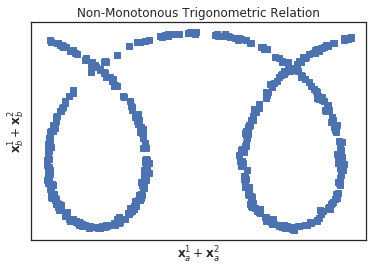

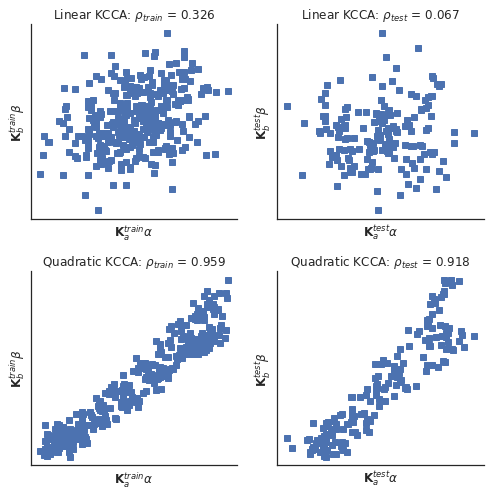

In [12]:
X, Y = generate_data_trig(500,10,10)   
Xn, Yn = standardize_data(X,Y)
Xtrain, Xtest, Ytrain, Ytest = partition_data(Xn,Yn)    

# compute the linear kernels
Kxtrain1 = Xtrain @ Xtrain.T
Kytrain1 = Ytrain @ Ytrain.T   
Kxtest1 = Xtest @ Xtrain.T
Kytest1 = Ytest @ Ytrain.T

# compute the quadratic kernels
Kxtrain2 = center_kernel((Xtrain @ Xtrain.T)**2)
Kytrain2 = center_kernel((Ytrain @ Ytrain.T)**2) 
Kxtest2 = center_test_kernel((Xtest @ Xtrain.T)**2,(Xtrain @ Xtrain.T)**2)
Kytest2 = center_test_kernel((Ytest @ Ytrain.T)**2,(Ytrain @ Ytrain.T)**2)

# perform linear KCCA
kcc1, alpha1, beta1 = kcca_gep(Kxtrain1,Kytrain1,0.02,0.02,1)
train_kcc1 = compute_correlation((Kxtrain1 @ alpha1).T, (Kytrain1 @ beta1).T)
test_kcc1 = compute_correlation((Kxtest1 @ alpha1).T, (Kytest1 @ beta1).T)

# perform quadratic KCCA
kcc2, alpha2, beta2 = kcca_gep(Kxtrain2,Kytrain2,0.02,0.02,1)
train_kcc2 = compute_correlation((Kxtrain2 @ alpha2).T, (Kytrain2 @ beta2).T)
test_kcc2 = compute_correlation((Kxtest2 @ alpha2).T, (Kytest2 @ beta2).T)
    
fig = plt.figure(figsize=(7, 7))
plt.subplot(221)
plt.plot(Kxtrain1 @ alpha1, Kytrain1 @ beta1, 'bs')
plt.ylabel(r'$\mathbf{K}_b^{train} \beta$')
plt.xlabel(r'$\mathbf{K}_a^{train} \alpha$')
plt.title(r'Linear KCCA: $\rho_{train}$ = %1.3f' % train_kcc1)
plt.xticks([])
plt.yticks([])

plt.subplot(222)
plt.plot((Kxtest1 @ alpha1), (Kytest1 @ beta1), 'bs')
plt.xticks([])
plt.yticks([])
plt.ylabel(r'$\mathbf{K}_b^{test} \beta$')
plt.xlabel(r'$\mathbf{K}_a^{test} \alpha$')
plt.title(r'Linear KCCA: $\rho_{test}$ = %1.3f' % test_kcc1)
    
plt.subplot(223)
plt.plot(Kxtrain2 @ alpha2, Kytrain2 @ beta2, 'bs')
plt.ylabel(r'$\mathbf{K}_b^{train} \beta$')
plt.xlabel(r'$\mathbf{K}_a^{train} \alpha$')
plt.title(r'Quadratic KCCA: $\rho_{train}$ = %1.3f' % train_kcc2)
plt.xticks([])
plt.yticks([])

plt.subplot(224)
plt.plot((Kxtest2 @ alpha2), (Kytest2 @ beta2), 'bs')
plt.xticks([])
plt.yticks([])
plt.ylabel(r'$\mathbf{K}_b^{test} \beta$')
plt.xlabel(r'$\mathbf{K}_a^{test} \alpha$')
plt.title(r'Quadratic KCCA: $\rho_{test}$ = %1.3f' % test_kcc2)
sns.despine()
plt.tight_layout()
plt.show()

Please answer here to the following questions.
1. Linear KCCA performs poorly on this dataset. How would CCA perform?

    It would perform in a similar way due to the fact that the KCCA linear kernel is the same as the CCA one.


2. Can we interpret the dual coefficient vectors $\boldsymbol \alpha$ and $\boldsymbol \beta$ in similar manner as $\mathbf{w}_a$ and $\mathbf{w}_b$?

    For linear models they can be interpreted in a similar way because the model is the same. For non-linear models $\boldsymbol \alpha$ and $\boldsymbol \beta$ can't be interpreted.
